# Car Selling Price Prediction Notebook

## Introduction

This notebook presents a comprehensive process for predicting car selling prices using a dataset containing various car attributes. The analysis begins with **Exploratory Data Analysis (EDA)** to understand the dataset's structure, key statistics, and visualize distributions and relationships between variables.

Following the EDA, **Hypothesis Testing** is performed to statistically validate relationships between different features. This includes:
- **2 Sample Independent T-tests** to compare means of a numeric variable across two groups of a categorical variable.
- **Anova Single Factor Tests** to compare means of a numeric variable across more than two groups of a categorical variable.
- **Z-tests** as an alternative parametric test for comparing two means with large sample sizes.
- **Paired/Related Sample T-tests** for comparing means from the same group under different conditions (demonstrated with an external example).
- **1 Sample Independent T-test** for comparing a sample mean to a hypothesized population mean.
- **Chi-Squared Tests** to assess the association between two categorical variables.
- **Non-parametric tests** like **Mann-Whitney U Test** and **Kruskal Wallis H test** as alternatives when assumptions for parametric tests are not met.

The notebook then proceeds to **Data Preprocessing**, which involves cleaning numerical columns by removing units, imputing missing values using the median, engineering a new 'age' feature, scaling numerical features using **StandardScaler, MinMaxScaler, and RobustScaler**, and dummy encoding categorical variables.

Finally, a **Multiple Linear Regression Model** is built to predict car selling prices. The process includes:
- Building an initial model with only numerical variables.
- Addressing the skewness of the target variable (`selling_price`) using a **logarithmic transformation**.
- Building a full model with all features (scaled numerical and dummy-encoded categorical) and the transformed target variable.
- Evaluating the model's performance using different methods:
    - **RMSE calculation on the full dataset** using the initially built model.
    - **RMSE calculation on the full dataset** using the model built with logarithmic transformation.
    - **Train-Test Split** (75/25 ratio) to evaluate the model's performance on unseen data, including **RMSE calculation** on the test set.

The comparison of RMSE values from these different approaches highlights the benefits of data transformation and evaluating the model on a separate test set for a more realistic assessment of its predictive accuracy.

## Loading libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
carsales = pd.read_csv('Car details v3.csv')

In [5]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
carsales.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


## Exploratory Data Analytics and Data Visualization

In [7]:
carsales.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
print(np.round(carsales.selling_price.describe()),2)
print(carsales.selling_price.skew())
print(carsales.selling_price.kurt())

count        8128.0
mean       638272.0
std        806253.0
min         29999.0
25%        254999.0
50%        450000.0
75%        675000.0
max      10000000.0
Name: selling_price, dtype: float64 2
4.193533440675855
21.081289012186755


Plots for Selling Price column

<Figure size 2000x1500 with 0 Axes>

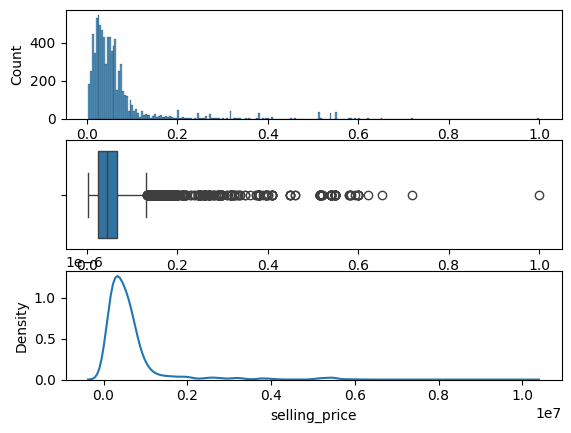

In [9]:
import seaborn as sns
plt.figure(figsize=(20,15))
fig,ax=plt.subplots(3,1) # Split Plot window into 3 Rows & 1 Column
sns.histplot(carsales.selling_price,ax=ax[0]) # Histogram with axis as 0
sns.boxplot(carsales.selling_price,ax=ax[1],orient="h") # Boxplot with axis 1
sns.kdeplot(carsales.selling_price,ax=ax[2]) # desnity plot with axis 2
plt.show()

# Different y-axis for each plot hence ax argument must be given

Plots for Kilometer Driven Column

<Figure size 2000x1500 with 0 Axes>

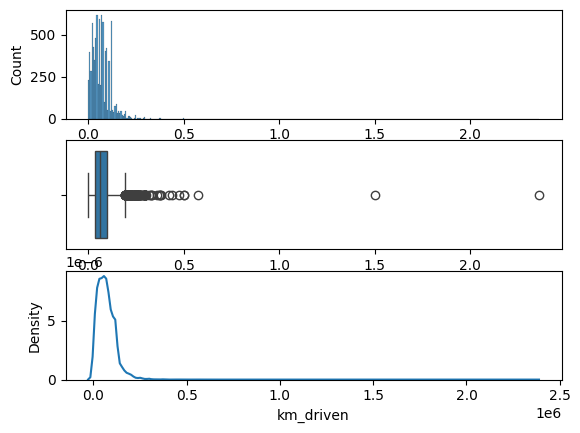

In [10]:
plt.figure(figsize=(20,15))
fig,ax=plt.subplots(3,1) # Split Plot window into 3 Rows & 1 Column
sns.histplot(carsales.km_driven,ax=ax[0]) # Histogram with axis as 0
sns.boxplot(carsales.km_driven,ax=ax[1],orient="h") # Boxplot with axis 1
sns.kdeplot(carsales.km_driven,ax=ax[2]) # desnity plot with axis 2
plt.show()

In [11]:
#printing frequency of each entry in different columns
for col in ['fuel', 'seller_type','transmission', 'owner','seats']:
    freq=carsales[col].value_counts()
    print(freq)

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64
seats
5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64


In [12]:
pd.crosstab(carsales.fuel,carsales.transmission)

transmission,Automatic,Manual
fuel,,
CNG,0,57
Diesel,534,3868
LPG,0,38
Petrol,516,3115


In [13]:
pd.crosstab(carsales.fuel,carsales.owner)

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
fuel,,,,,
CNG,34,2,18,0,3
Diesel,2804,88,1223,1,286
LPG,17,2,14,0,5
Petrol,2434,82,850,4,261


Using Group By

In [14]:
# What is the average selling_price of different transmission?
np.round(carsales.selling_price.groupby(carsales.transmission).mean(),2)

,selling_price
transmission,
Automatic,1870827.60
Manual,455425.86


In [15]:
# What is Average km_driven for different fuel?
carsales.km_driven.groupby(carsales.fuel).mean()

,km_driven
fuel,
CNG,68288.438596
Diesel,83677.137210
LPG,89174.105263
Petrol,52840.861746


In [16]:
# What is Median selling_price for different owner?
carsales.selling_price.groupby(carsales.owner).median()

,selling_price
owner,
First Owner,550000.0
Fourth & Above Owner,170000.0
Second Owner,310000.0
Test Drive Car,5923000.0
Third Owner,225000.0


In [17]:
# Pandas - pivot_table() function
np.round(pd.pivot_table(carsales,index=["fuel"],values="selling_price",columns=['owner'],
               aggfunc="mean"),2)

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
fuel,,,,,
CNG,354029.32,189500.00,233055.56,NaN,182333.33
Diesel,979232.49,317005.61,491297.79,1350000.0,377986.59
LPG,250882.35,135000.00,164071.43,NaN,156800.00
Petrol,566834.08,131048.76,258636.48,5167250.0,184648.82


In [18]:
np.round(pd.pivot_table(carsales,index=["fuel","seller_type"],values="selling_price",
                        columns=['owner'],aggfunc="mean"),2)

owner                    First Owner  Fourth & Above Owner  Second Owner  \
fuel   seller_type                                                         
CNG    Individual          354029.32             189500.00     233055.56   
Diesel Dealer             1799430.57                   NaN     725705.85   
       Individual          739376.52             317005.61     469981.49   
       Trustmark Dealer    900000.00                   NaN     750000.00   
LPG    Dealer              225000.00                   NaN     110000.00   
       Individual          252500.00             135000.00     168230.77   
Petrol Dealer             1038026.06                   NaN     469466.60   
       Individual          442909.87             131048.76     250314.20   
       Trustmark Dealer    811420.00                   NaN     500000.00   

owner                    Test Drive Car  Third Owner  
fuel   seller_type                                    
CNG    Individual                   NaN    182333.33  
Diesel Dealer                 1350000.0    395000.00  
       Individual                   NaN    377926.90  
       Trustmark Dealer             NaN          NaN  
LPG    Dealer                       NaN          NaN  
       Individual                   NaN    156800.00  
Petrol Dealer                 5167250.0    263333.33  
       Individual                   NaN    183733.89  
       Trustmark Dealer             NaN          NaN

## Data Preprocessing

### Dropping string from numerical columns

In [19]:
carsales.head(2) #we see that some columns have numerical values along with string like mileage. We need to drop the strings

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [20]:
carsales.mileage=carsales.mileage.str.replace("kmpl","") # Replace kmpl with space

# Convert datatype to numeric. errors=coerce means where ever conversion not done impute
carsales.mileage=pd.to_numeric(carsales.mileage,errors="coerce")

In [21]:
carsales.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [22]:
# To show the kind of items returned by zip
pattern=["CC","bhp"]
columns=["engine","max_power"]
arr=zip(columns, pattern)
for item in arr:
    print(item)

('engine', 'CC')
('max_power', 'bhp')


Replacing "CC" and "bhp" from "engine" & "mad_power" column

In [23]:
pattern=["CC","bhp"]
columns=["engine","max_power"]
for column, suffix in zip(columns, pattern):
    carsales[column] = carsales[column].str.replace(suffix, "")
    carsales[column] = pd.to_numeric(carsales[column], errors="coerce")

In [24]:
carsales.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0


In [25]:
carsales.torque.head(2)

,torque
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm


In [26]:
#creates a new column named torq and fills it with the extracted value matching a digit followed by 'rpm'
carsales['torq']=carsales.torque.str.extract('(\d+(rpm))')[0] # \d+ regular Expression

In [27]:
carsales.torq=carsales.torq.str.replace("rpm","")
carsales.torq=pd.to_numeric(carsales.torq,errors="coerce")

In [28]:
carsales.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torq
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,2500.0


### Missing Value Imputation

In [29]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7819 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  torq           7332 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 889.1+ KB


In [30]:
# Columns with missing values = mileage, engine, max_power, torque, seats
# Hence we need to do missing value imputation - Count less than 8128
carsales[['mileage', 'engine', 'max_power','seats', 'torq']].describe()

# But what do we fill the missing values with?
# Numeric Variables - Mean & Median(50%) are closer to One another. Either of them can
# be used.
# If there is big difference between mean and median, median must be used as mean gets
# distorted by smaller or larger values(outliers)

,mileage,engine,max_power,seats,torq
count,7819.000000,7907.000000,7912.000000,7907.000000,7332.000000
mean,19.390375,1458.625016,91.517919,5.416719,3072.693126
std,4.001777,503.916303,35.822499,0.959588,919.097085
min,0.000000,624.000000,0.000000,2.000000,500.000000
25%,16.780000,1197.000000,68.050000,5.000000,2250.000000
50%,19.300000,1248.000000,82.000000,5.000000,3000.000000
75%,22.320000,1582.000000,102.000000,5.000000,4000.000000
max,42.000000,3604.000000,400.000000,14.000000,5300.000000


In [31]:
#  median imputation
for col in ['mileage', 'engine', 'max_power','seats', 'torq']:
    carsales[col]=carsales[col].fillna(carsales[col].median())

### Creating New Column: "Age" from "year"

In [32]:
# Create a new variable "age" by deducting year(purchase year) as of 2023
carsales['age']=2025-carsales.year

In [33]:
carsales.age.describe()

,age
count,8128.000000
mean,11.195989
std,4.044249
min,5.000000
25%,8.000000
50%,10.000000
75%,14.000000
max,42.000000


### Split Columns into Numeric and Object types

In [34]:
# Split Data into numeric and object columns
numericcols=carsales.select_dtypes(include=np.number) # np.number includes int & float
objectcols=carsales.select_dtypes(include=['object'])

In [35]:
numericcols.columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'torq', 'age'],
      dtype='object')

In [36]:
objectcols.columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'], dtype='object')

In [37]:
numericcols=numericcols.drop('year',axis=1) # axis=1 refers Columns, axis=0 refers rows

## Covariance and Correlation

In [38]:
numericcols.cov() # Covariance

,selling_price,km_driven,mileage,engine,max_power,seats,torq,age
selling_price,6.500446e+11,-1.028300e+10,-393883.620065,1.841046e+08,2.133284e+07,36059.501123,-1.870860e+07,-1.350225e+06
km_driven,-1.028300e+10,3.197965e+09,-37999.481196,5.603984e+06,-8.122108e+04,11797.523050,-1.114023e+07,9.559975e+04
mileage,-3.938836e+05,-3.799948e+04,15.405632,-1.123573e+03,-5.135394e+01,-1.681783,-6.174058e+02,-4.897333e+00
engine,1.841046e+08,5.603984e+06,-1123.572844,2.482000e+05,1.240075e+04,289.412534,-8.749638e+04,-7.223363e+01
max_power,2.133284e+07,-8.122108e+04,-51.353944,1.240075e+04,1.251489e+03,6.530799,-5.242487e+01,-3.214854e+01
seats,3.605950e+04,1.179752e+04,-1.681783,2.894125e+02,6.530799e+00,0.900362,-1.633021e+02,-3.922534e-02
torq,-1.870860e+07,-1.114023e+07,-617.405839,-8.749638e+04,-5.242487e+01,-163.302146,7.624682e+05,-3.508807e+02
age,-1.350225e+06,9.559975e+04,-4.897333,-7.223363e+01,-3.214854e+01,-0.039225,-3.508807e+02,1.635595e+01


In [39]:
numericcols.corr() # Correlation

,selling_price,km_driven,mileage,engine,max_power,seats,torq,age
selling_price,1.000000,-0.225534,-0.124468,0.458345,0.747935,0.047135,-0.026574,-0.414092
km_driven,-0.225534,1.000000,-0.171199,0.198911,-0.040599,0.219860,-0.225604,0.418006
mileage,-0.124468,-0.171199,1.000000,-0.574593,-0.369846,-0.451566,-0.180144,-0.308519
engine,0.458345,0.198911,-0.574593,1.000000,0.703612,0.612220,-0.201131,-0.035851
max_power,0.747935,-0.040599,-0.369846,0.703612,1.000000,0.194556,-0.001697,-0.224704
seats,0.047135,0.219860,-0.451566,0.612220,0.194556,1.000000,-0.197094,-0.010222
torq,-0.026574,-0.225604,-0.180144,-0.201131,-0.001697,-0.197094,1.000000,-0.099360
age,-0.414092,0.418006,-0.308519,-0.035851,-0.224704,-0.010222,-0.099360,1.000000


<Axes: >

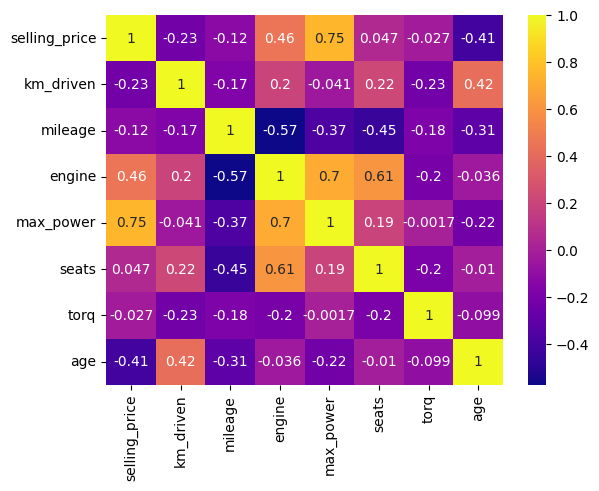

In [40]:
sns.heatmap(numericcols.corr(),annot=True,cmap="plasma")

## Data Scaling

In [41]:
numericcols=numericcols.drop('selling_price',axis=1)

In [42]:
from sklearn.preprocessing import StandardScaler

**Standard Scaler**

In [43]:
numericcols_scaled=StandardScaler().fit_transform(numericcols)

numericcols_scaled=pd.DataFrame(numericcols_scaled,columns=numericcols.columns) # converting the scaled values to a dataframe

numericcols_scaled.head(3)

,km_driven,mileage,engine,max_power,seats,torq,age
0,1.338363,1.022499,-0.411305,-0.488067,-0.427258,-1.220392,-0.048464
1,0.887411,0.446667,0.090536,0.346439,-0.427258,-0.647747,-0.048464
2,1.241098,-0.429820,0.088528,-0.374990,-0.427258,-0.075101,1.929775


**MinMax Scaler**

In [44]:
from sklearn.preprocessing import MinMaxScaler

numericcols_minmax=MinMaxScaler().fit_transform(numericcols)

numericcols_minmax=pd.DataFrame(numericcols_minmax,columns=numericcols.columns)

numericcols_minmax.head(3)

,km_driven,mileage,engine,max_power,seats,torq,age
0,0.061640,0.557143,0.209396,0.1850,0.25,0.312500,0.162162
1,0.050837,0.503333,0.293289,0.2588,0.25,0.416667,0.162162
2,0.059310,0.421429,0.292953,0.1950,0.25,0.520833,0.378378


**Robust Scaler**

In [45]:
from sklearn.preprocessing import RobustScaler

numericcols_robust=RobustScaler().fit_transform(numericcols)

numericcols_robust=pd.DataFrame(numericcols_robust,columns=numericcols.columns)

numericcols_robust.head(3)

,km_driven,mileage,engine,max_power,seats,torq,age
0,1.357143,0.777989,0.000000,-0.241327,0.0,-0.666667,0.166667
1,0.952381,0.349146,0.649351,0.649170,0.0,-0.333333,0.166667
2,1.269841,-0.303605,0.646753,-0.120664,0.0,0.000000,1.500000


## Scatter Plot

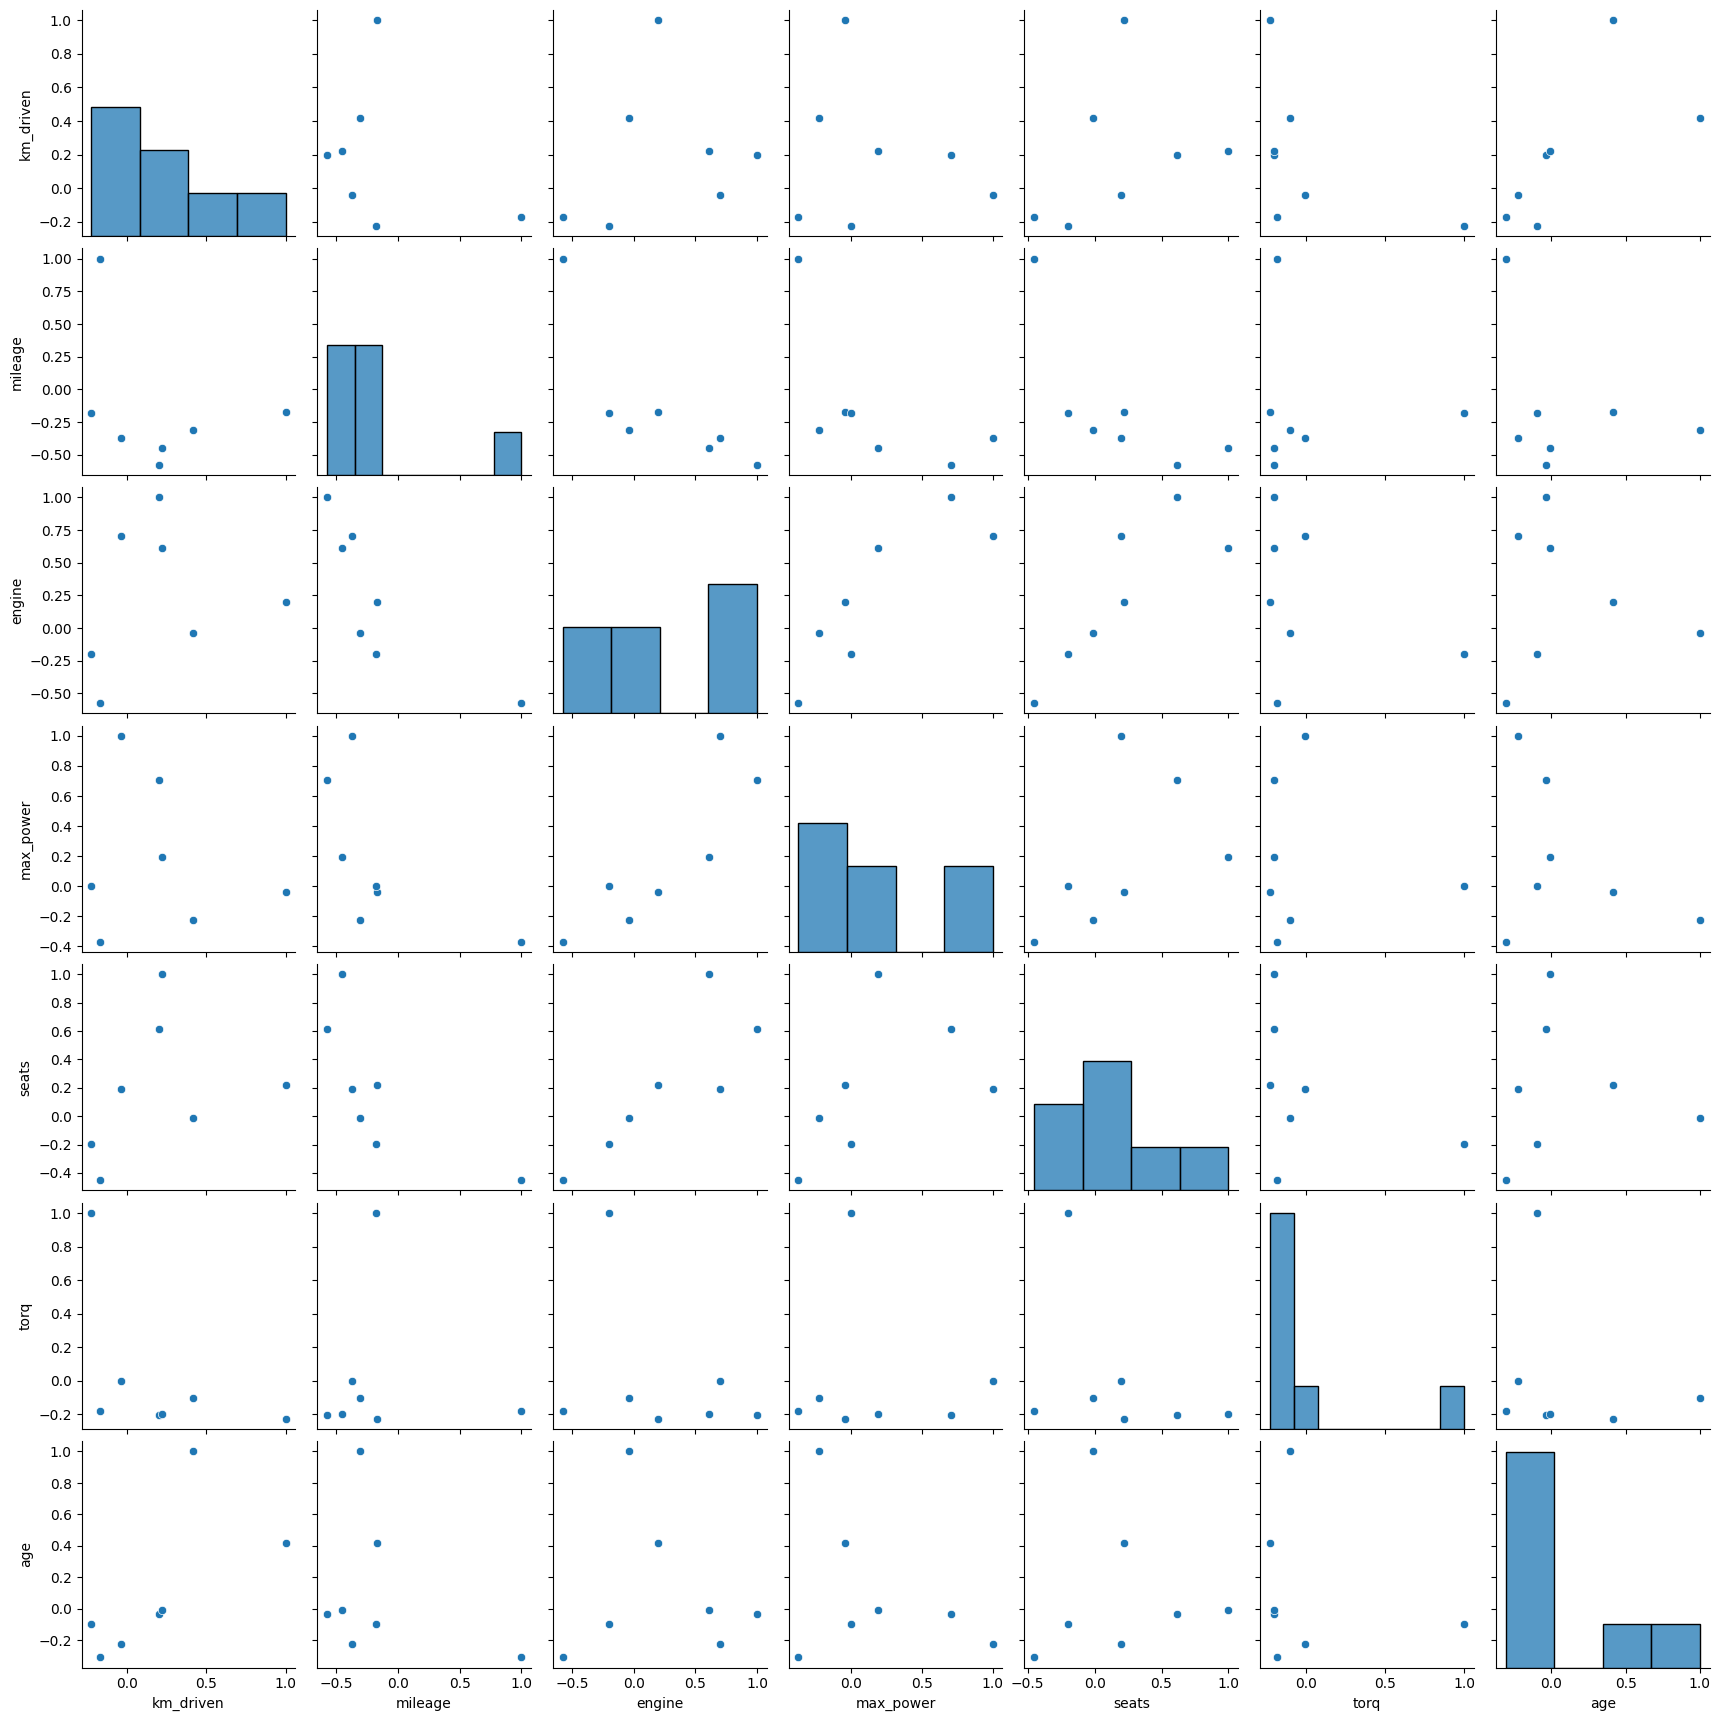

In [46]:
# Bivariate Plot - Scatter plot
sns.pairplot(numericcols.corr())

## **Hypothesis Testing Begins**

### **2 Sample T Test**

In [47]:
# Null Hypothesis: Average selling_price of different transmission is equal/identical
np.round(carsales.selling_price.groupby(carsales.transmission).mean(),2)
# Means are different
# Exactly 2 levels/classes/groups in Categorical Variable -> 2 Sample Independent T test

,selling_price
transmission,
Automatic,1870827.60
Manual,455425.86


In [48]:
carsales.selling_price.groupby(carsales.transmission).var()
# There are 2 Types of 2 Sample Independent T test
# 1) 2 Sample Independent T test assuming Equal Variances
# 2) 2 Sample Independent T test assuming UnEqual Variances

,selling_price
transmission,
Automatic,2.691349e+12
Manual,8.872370e+10


In [49]:
# Frame Null & Alternate Hypothesis - 2 Tail test
# Null - There is no significant difference in average selling_price of different
# transmission. ( Both Means can be treated as identical)
# Ho=mean1=mean2 or Ho=mean1 - mean2 = 0

# Alt - There is significant difference in average selling_price of different
# transmission. ( Both Means cannot be treated as identical)
# Ha- mean1 != mean2 or Ha- mean1 - mean2 != 0

In [50]:
# Split Data into as many levels/groups
auto=carsales[carsales.transmission=="Automatic"]
manual=carsales[carsales.transmission=="Manual"]

In [51]:
from scipy.stats import ttest_ind

ttest_ind(auto.selling_price,manual.selling_price,equal_var=False)
# Since pvalue=8.531946079710315e-129 is less than 0.05, Reject Null Hypothesis
# Both Means cannot be treated as identical

TtestResult(statistic=np.float64(27.888813193478946), pvalue=np.float64(8.531946079710315e-129), df=np.float64(1059.2814874514092))

In [52]:
# Null Hypothesis: Average km_driven for different transmission is equal/identical
# groupby()-mean&var, Frame Null & Alt, Conduct Test & infer based on p-value

carsales.km_driven.groupby(carsales.transmission).mean()
# Manual Car owners drive more kilometers than auto matic cars owners

,km_driven
transmission,
Automatic,40276.086667
Manual,74202.188895


In [53]:
carsales.km_driven.groupby(carsales.transmission).var()

,km_driven
transmission,
Automatic,1.250228e+09
Manual,3.338416e+09


In [54]:
# Null - There is no significant difference in average km_driven of different
# transmission. ( Both Means can be treated as identical)
# Ho=mean1=mean2 or Ho=mean1 - mean2 = 0

# Alt - There is significant difference in average km_driven of different
# transmission. ( Both Means cannot be treated as identical)
# Ha- mean1 != mean2 or Ha- mean1 - mean2 != 0

In [55]:
ttest_ind(auto.km_driven,manual.km_driven,equal_var=False)
# Since pvalue=2.851791533885484e-131 is less than 0.05, Reject Null Hypothesis

TtestResult(statistic=np.float64(-26.31311123939943), pvalue=np.float64(2.851791533885484e-131), df=np.float64(1998.1925323759576))

### **Anova Single Factor Test**

In [56]:
# Null Hypothesis: Average km_driven for different fuel is identical/equal
carsales.km_driven.groupby(carsales.fuel).mean()
# Since more than 2 levels/groups/classes - Anova Single Factor

,km_driven
fuel,
CNG,68288.438596
Diesel,83677.137210
LPG,89174.105263
Petrol,52840.861746


In [57]:
# Null - There is no significant difference in average km_driven of different
# fuel. ( Both Means can be treated as identical)
# Ho=mean1=mean2=mean3=mean4 or Ho=mean1 - mean2 - mean3 -mean4 = 0

# Alt - There is significant difference in average km_driven of different
# fuel. ( Both Means cannot be treated as identical)
# Ha- mean1 != mean2 !=mean3 !=mean4 or Ha- mean1 - mean2 -mean3 -mean 4!= 0

In [58]:
# Split Data
cng=carsales[carsales.fuel=="CNG"]
lpg=carsales[carsales.fuel=="LPG"]
diesel=carsales[carsales.fuel=="Diesel"]
petrol=carsales[carsales.fuel=="Petrol"]

In [59]:
from scipy.stats import f_oneway

f_oneway(cng.km_driven,lpg.km_driven,diesel.km_driven,petrol.km_driven)
# Since pvalue=7.885831951501059e-134 is less than 0.05, Reject Null Hypothesis

F_onewayResult(statistic=np.float64(214.36315838558957), pvalue=np.float64(7.885831951501059e-134))

In [60]:
# Null Hypothesis: Average mileage of different fuel is identical/equal
# groupby()-mean, Frame Null & Alt, Conduct Test & infer

In [61]:
carsales.mileage.groupby(carsales.fuel).mean()

,mileage
fuel,
CNG,19.300000
Diesel,19.634607
LPG,19.300000
Petrol,19.088956


In [62]:
# Null - There is no significant difference in average mileage of different
# fuel. ( Both Means can be treated as identical)
# Ho=mean1=mean2=mean3=mean4 or Ho=mean1 - mean2 - mean3 -mean4 = 0

# Alt - There is significant difference in average mileage of different
# fuel. ( Both Means cannot be treated as identical)
# Ha- mean1 != mean2 !=mean3 !=mean4 or Ha- mean1 - mean2 -mean3 -mean 4!= 0

In [63]:
f_oneway(cng.mileage,lpg.mileage,petrol.mileage,diesel.mileage)
# Since pvalue=2.128789005537978e-08 is less than 0.05, Reject Null

F_onewayResult(statistic=np.float64(12.890258167021218), pvalue=np.float64(2.128789005537978e-08))

### **Z-Test**

In [64]:
# Statistics prescribes Z Test for 2 Independent Samples if samplesize(n)>30.
# Z Test is also a parametric test assumes Normal distribution of numeric variable

from statsmodels.stats.weightstats import ztest

# NUll- means of two populations are equal, or H0: µ1 = µ2.
# Alt-  means are not equal, or H1: µ1 ≠ µ2.

ztest(auto.selling_price,manual.selling_price)
# Since p-value=0.0 is less than 0.05, Reject Null

(np.float64(65.67438825296097), np.float64(0.0))

### **Paired/Related Sample T Test**

In [65]:
# Paired Sample T Test - Before and After an Event
# Monthly CPI(Inflation) of India 12 months before demonitization and after demonitization
beforedemon=[3.35,4.14,5.30,6.46,6.13,6.59,5.86,5.51,5.53,5.91,6.32,6.72]
afterdemon=[2.59,2.23,1.86,2.62,2.61,2.21,1.09,1.08,1.79,2.52,2.89,3.24]

print(np.mean(beforedemon))
print(np.mean(afterdemon))

5.651666666666667
2.2274999999999996


In [66]:
# Null - There is no Significant difference in Average CPI(inflation) before and after
# demonitization
# Alt - There is Significant difference in Average CPI(inflation) before and after
# demonitization

from scipy.stats import ttest_rel

ttest_rel(beforedemon,afterdemon)
# Since pvalue=3.600767294619255e-07 is less than 0.05, Reject null

TtestResult(statistic=np.float64(10.74164855224715), pvalue=np.float64(3.600767294619255e-07), df=np.int64(11))

In [67]:
# Monthly inflation of india before and after GST Imnplementation
beforegst=[1.08,1.09,2.21,2.61,2.62,1.86,2.23,2.59,3.35,4.14,5.30,6.46]
aftergst=[1.79,2.52,2.89,3.24,3.97,4.00,5.11,4.74,4.36,3.97,3.96,3.93]

print(np.mean(beforegst))
print(np.mean(aftergst))

2.9616666666666664
3.706666666666667


In [68]:
# Null - There is no Significant difference in Monthly inflation before and after
# GST implementation
# Alt - There is Significant difference in Monthly inflation before and after
# GST implementation

ttest_rel(beforegst,aftergst)
# Since  pvalue=0.11695 is greater than 0.05, Fail to Reject Null

TtestResult(statistic=np.float64(-1.701279692640982), pvalue=np.float64(0.11695042528410868), df=np.int64(11))

### **1 Sample Independent T Test**

In [69]:
# Test Null Average selling_price is greater than 750000
# One Sample T test - Right Tailed test since mean > 750000

from scipy.stats import ttest_1samp

# Null- sample mean is less than or equal to the population mean.
# Alt - sample mean is greater than the population mean

t_statistic, p_value_two_tailed=ttest_1samp(carsales.selling_price,750000)

p_value_right_tail = p_value_two_tailed / 2 if t_statistic > 0 else 1 - p_value_two_tailed / 2

print(f"T-statistic: {t_statistic}")
print(f"Right-tailed P-value: {p_value_right_tail}")

T-statistic: -12.493469435585197
Right-tailed P-value: 1.0


In [70]:
carsales.to_excel("carsales.xlsx")

### **Chi Squared Test**

In [71]:
# Non parametric Test - Chi Square Test of Independence done when both variables are
# Non Numeric and Categorical
# Input for this test is Cross Tabulation
# Cross tabulation is Frequency count of 2 Non Numeric variables

# Null - There is no Association between both variables. (Independence/No Relation)
# Alt - There is Association between both variables. (Dependence/Relation)

In [72]:
# Test Null No Association between transmission and fuel
pd.crosstab(carsales.transmission,carsales.fuel) # Cross Tabulation

fuel,CNG,Diesel,LPG,Petrol
transmission,,,,
Automatic,0,534,0,516
Manual,57,3868,38,3115


In [73]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(carsales.transmission,carsales.fuel))
# Since pvalue=6.801498516561924e-05 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=np.float64(21.912764347384904), pvalue=np.float64(6.801498516561924e-05), dof=3, expected_freq=array([[   7.36343504,  568.66387795,    4.90895669,  469.06373031],
       [  49.63656496, 3833.33612205,   33.09104331, 3161.93626969]]))

In [74]:
# Test Null No Association between fuel and owner
pd.crosstab(carsales.fuel,carsales.owner)

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
fuel,,,,,
CNG,34,2,18,0,3
Diesel,2804,88,1223,1,286
LPG,17,2,14,0,5
Petrol,2434,82,850,4,261


In [75]:
chi2_contingency(pd.crosstab(carsales.fuel,carsales.owner))
# Since pvalue=0.0011483 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=np.float64(32.52334914896778), pvalue=np.float64(0.0011483358411699103), dof=12, expected_freq=array([[3.70906742e+01, 1.22022638e+00, 1.47619341e+01, 3.50639764e-02,
        3.89210138e+00],
       [2.86444119e+03, 9.42357283e+01, 1.14003568e+03, 2.70792323e+00,
        3.00579478e+02],
       [2.47271161e+01, 8.13484252e-01, 9.84128937e+00, 2.33759843e-02,
        2.59473425e+00],
       [2.36274102e+03, 7.77305610e+01, 9.40361097e+02, 2.23363681e+00,
        2.47933686e+02]]))

### **Mann Whitney U Test**

In [76]:
# Parametric Tests assume Numeric variable to be closer to normal distribution.
# Non Parmetric Tests are also used when numeric variable is not closer to normal
# distribution. Non Parametric tests use Median comaprision instead of mean comaprision
# that isdone in parametric tests.

# Comparitive Non Paremetric Test for 2 Sample Independent T test is Mann- Whitney U Test
# Used when variable 1 is numeric and variable 2 is non numeric with exactly 2 levels/
# groups/classes.

# First Medians must be different
carsales.selling_price.groupby(carsales.transmission).median()

,selling_price
transmission,
Automatic,1100000.0
Manual,400000.0


In [77]:
# Null-There is no significant difference in Median selling_price of different transmission
# Alt-There is significant difference in Median selling_price of different transmission

from scipy.stats import mannwhitneyu

mannwhitneyu(auto.selling_price,manual.selling_price,method="asymptotic")
# method="asymptotic" is correction for tied ranks (same ranks)
# Since pvalue=2.796496981839025e-309 is less than 0.05, Reject Null

MannwhitneyuResult(statistic=np.float64(6383103.0), pvalue=np.float64(2.796496981839025e-309))

In [78]:
# Reject Null Scenarios indicate the one variable impacts the other variable
# Transmission is a variable that effects selling_price of a car
# so while building the Machine Learning Model, include transmission as an Independent Variable

# Fail to Reject Null Scenarios indicate no effect of variables on one another.

# Relationship/Effects between numeric variables - Correlation and Covariance
# Relationship/Effects between non numeric variables - Chi Square test of Independence
# Relationship/Effects between a numeric variable and Non Numeric Variable - Hypothesis Testing

### **Kruskal Wallis H test**

In [79]:
# Comparitive Non Parametric test for Anova Single Factor is Kruskal Wallis H test

# Null - There is no Significant difference in Median selling_price of different fuel
# Alt - There is Significant difference in Median selling_price of different fuel

from scipy.stats import kruskal

kruskal(cng.selling_price,lpg.selling_price,petrol.selling_price,diesel.selling_price)
# Since pvalue=5.035834991933108e-203 is less than 0.05, Reject Null

KruskalResult(statistic=np.float64(938.010696475517), pvalue=np.float64(5.035834991933108e-203))

## **Dummy Encoding**

In [80]:
# Dummy Encode objectcols. Converting Text/Object Data into boolean or Numbers
objectcols_dummy=pd.get_dummies(objectcols, columns=['fuel','seller_type','transmission',
                                                     'owner'])

In [81]:
objectcols_dummy.head(4)

,name,torque,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,190Nm@ 2000rpm,False,True,False,False,False,True,False,False,True,True,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,250Nm@ 1500-2500rpm,False,True,False,False,False,True,False,False,True,False,False,True,False,False
2,Honda City 2017-2020 EXi,"12.7@ 2,700(kgm@ rpm)",False,False,False,True,False,True,False,False,True,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,22.4 kgm at 1750-2750rpm,False,True,False,False,False,True,False,False,True,True,False,False,False,False


In [82]:
objectcols_dummy=objectcols_dummy.drop(['name','torque'],axis=1) # Dropping Columns

## **Creating Final Dataframe**

In [83]:
# Column Concatenation or Side by Side Pasting of Columns
carsales_final=pd.concat([numericcols_scaled,objectcols_dummy],axis=1)

In [84]:
# Split Data into dependent variable(y) and Independent Variables (X's)
y=carsales.selling_price
X=carsales_final

In [85]:
carsales_final.to_excel("carsales_final.xlsx")

## **Multiple Linear Regression**

### Building model with Numerical Variables only

<Axes: >

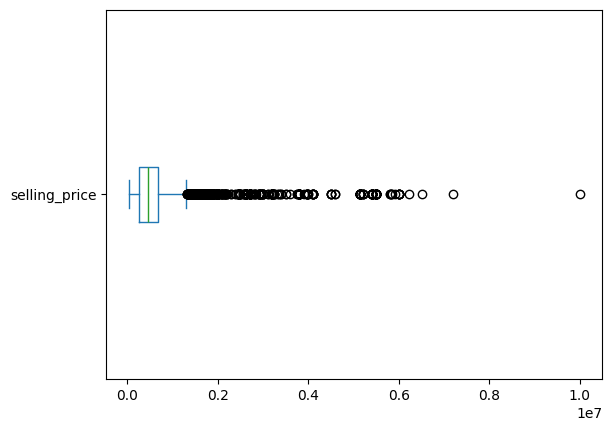

In [86]:
# Process of Multiple Linear Regression - Pre Model Assumption related to dependent
# variable(y) must be checked for Normal Distribution, Skewness and Outliers.
y.plot(kind="box",vert=False) # Positive Skewness with Outliers on Maximum Side

# Skewness & Outliers will effect model R Square either it will be less than 0.60
# which is underfitting or marginally above 0.60.

In [87]:
X_excel=carsales_final[['km_driven','mileage','engine','max_power','age']]

In [88]:
from sklearn.linear_model import LinearRegression

regmodel=LinearRegression().fit(X_excel,y) # Fitting/Building Model

regmodel.score(X_excel,y) # R Square.

0.6362299731909866

In [89]:
regmodel.intercept_

np.float64(638271.8077017715)

In [90]:
print(list(zip(X_excel.columns,regmodel.coef_)))

[('km_driven', np.float64(-86666.17330675403)), ('mileage', np.float64(56766.307068251626)), ('engine', np.float64(1886.4939034922427)), ('max_power', np.float64(585789.4703581204)), ('age', np.float64(-148405.3963308059))]


In [91]:
reg_pred_price=regmodel.predict(X_excel)

In [92]:
reg_resid=y-reg_pred_price

In [93]:
np.sqrt(np.mean(np.square(reg_resid)))

np.float64(486248.5277808005)

### Build Full Model with all variables both numeric and dummyencoded non numeric

In [94]:
# Build Full Model with all variables both numeric and dummyencoded non numeric
reg_model_final=LinearRegression().fit(X,y)

In [95]:
reg_model_final.score(X,y) # R Square -0.6911

0.6911779600619548

In [118]:
reg_predict=reg_model_final.predict(X) # predicted selling_price using equation
reg_predict

array([375668.62185679, 681626.59811305,  86840.14871623, ...,
       182132.52858849, 304258.93221364, 304258.93221364])

In [97]:
reg_residual=y-reg_predict # Calculate Residual=sellingprice-predictedsellingprice

In [125]:
# RMSE
normal_method_error = np.sqrt(np.mean(np.square(reg_residual))) # RMSE - 448021.63547
normal_method_error

np.float64(448021.635471949)

### Building Model with Logarithmic Transformation of y

In [99]:
# Logarthmic Transformation of y
print(y.head())
print(np.log(y).head()) # Logarthmic Transformation

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64
0    13.017003
1    12.821258
2    11.970350
3    12.323856
4    11.775290
Name: selling_price, dtype: float64


In [100]:
# Build Regression Model with Logarthmic Transformation of y
regmodel_log=LinearRegression().fit(X,np.log(y))

In [101]:
regmodel_log.score(X,np.log(y)) # R Square increased and in Good Range

0.8685342303421699

In [102]:
regmodel_log_predict=regmodel_log.predict(X) # predictions

In [103]:
regmodel_log_predict=np.exp(regmodel_log_predict) # convert from log to Actua Value

In [104]:
regmodel_log_resid=y-regmodel_log_predict

In [124]:
regmodel_log_error = np.sqrt(np.mean(np.square(regmodel_log_resid))) # RMSE - 334754.5175
regmodel_log_error

np.float64(334754.51757289673)

In [106]:
regmodel_log_predict

array([379003.90795507, 488862.12523936, 126746.94277066, ...,
       212861.87392338, 345432.174587  , 345432.174587  ])

### **Train Test Split Process**

In [120]:
# 3 methods - 1) Create a test dataset or 2) Randomly choose rows from existing
# data as test data or 3) Cross Validation

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# Random Sampling - Train Data 75% and Test Data 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [110]:
# Train Dataset is used for Building Machine Learning Model
# Test Dataset is used for testing built Machine Learning Model

In [111]:
reg_train=LinearRegression().fit(X_train,np.log(y_train)) # Built Model on train Data

In [112]:
reg_train.score(X_train,np.log(y_train)) # R Square

0.8696238382583747

In [113]:
reg_test_pred=reg_train.predict(X_test) # Predictions on test Data

In [114]:
reg_test_pred=np.exp(reg_test_pred) # Converting to Actual Values

In [115]:
reg_test_residual=y_test-reg_test_pred # Calculating Residual

In [116]:
np.sqrt(np.mean(np.square(reg_test_residual))) # RMSE

np.float64(305975.6985344945)

In [122]:
from sklearn.metrics import root_mean_squared_error

train_test_split_method_error = root_mean_squared_error(y_test,reg_test_pred)
train_test_split_method_error

305975.6985344945

## Comparison of Predictions

In [127]:
print(f'normal_method_error: {normal_method_error}')
print(f'regmodel_log_error: {regmodel_log_error}')
print(f'train_test_split_method_error: {train_test_split_method_error}')

normal_method_error: 448021.635471949
regmodel_log_error: 334754.51757289673
train_test_split_method_error: 305975.6985344945


Clearly we can see that train_test_split_method gives the least error.